<a href="https://colab.research.google.com/github/jennifergc/fits_plotting_tool/blob/main/Fits_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from astropy.io import fits
#import matplotlib.pyplot as pltfrom astropy.io import fits
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import RectangleSelector
import ipywidgets as widgets
from IPython.display import display
from pathlib import Path

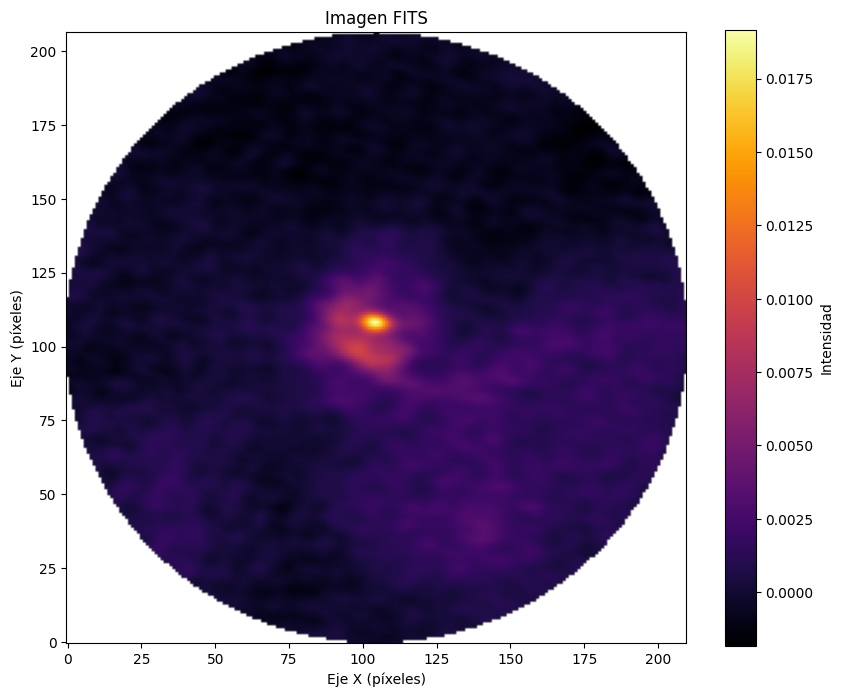

In [17]:
# Abre el archivo .fits
hdul = fits.open('ALMA01582922_CONTI_P2019_cutted.fits')

# Accede a los datos
datos = hdul[0].data

# Selecciona la parte de los datos que deseas graficar.
# Asumiendo que deseas la primera imagen en el primer plano del cubo de datos:
datos_2d = datos[0, 0, :, :]

plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
plt.imshow(datos_2d, cmap='inferno', origin='lower')  # Cambia a 'inferno' si prefieres más contraste
plt.colorbar(label="Intensidad")
plt.title("Imagen FITS")
plt.xlabel("Eje X (píxeles)")
plt.ylabel("Eje Y (píxeles)")
plt.show()


In [18]:
from astropy.wcs import WCS

# Abrir el archivo FITS
hdul = fits.open('ALMA01582922_CONTI_P2019_cutted.fits')

# Extraer la información WCS del header
wcs = WCS(hdul[0].header)

# Mostrar el WCS para verificar si tiene la información de coordenadas
print(wcs)


WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN' 'DEC--SIN' 'FREQ' 'STOKES' 
CRVAL : np.float64(275.1034376186) np.float64(-16.19307644544) np.float64(397935758795.8) np.float64(1.0) 
CRPIX : np.float64(103.0) np.float64(112.0) np.float64(1.0) np.float64(1.0) 
PC1_1 PC1_2 PC1_3 PC1_4  : np.float64(1.0) np.float64(0.0) np.float64(0.0) np.float64(0.0) 
PC2_1 PC2_2 PC2_3 PC2_4  : np.float64(0.0) np.float64(1.0) np.float64(0.0) np.float64(0.0) 
PC3_1 PC3_2 PC3_3 PC3_4  : np.float64(0.0) np.float64(0.0) np.float64(1.0) np.float64(0.0) 
PC4_1 PC4_2 PC4_3 PC4_4  : np.float64(0.0) np.float64(0.0) np.float64(0.0) np.float64(1.0) 
CDELT : np.float64(-3.055555554292e-06) np.float64(3.055555554292e-06) np.float64(15579019882.46) np.float64(1.0) 
NAXIS : 210  207  1  1


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


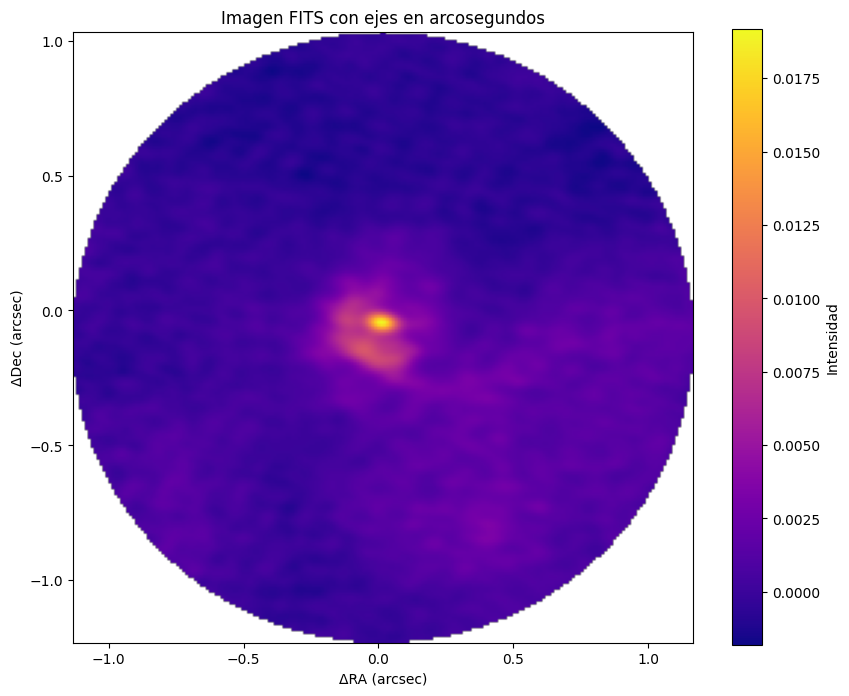

In [20]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
import numpy as np

# Convertir CDELT a arcosegundos
cdelt_arcsec = np.abs(np.array([-3.055555554292e-06, 3.055555554292e-06]) * 3600)

# Crear los ejes en arcosegundos
ny, nx = datos_2d.shape  # Dimensiones de la imagen
x_axis = (np.arange(nx) - 103) * cdelt_arcsec[0]  # Centrado en CRPIX
y_axis = (np.arange(ny) - 112) * cdelt_arcsec[1]

# Graficar
plt.figure(figsize=(10, 8))
plt.imshow(datos_2d, cmap='plasma', origin='lower', extent=[x_axis.min(), x_axis.max(), y_axis.min(), y_axis.max()])
plt.colorbar(label="Intensidad")

# Etiquetas de los ejes en arcosegundos
plt.xlabel("ΔRA (arcsec)")
plt.ylabel("ΔDec (arcsec)")
plt.title("Imagen FITS con ejes en arcosegundos")

# Mostrar
plt.show()


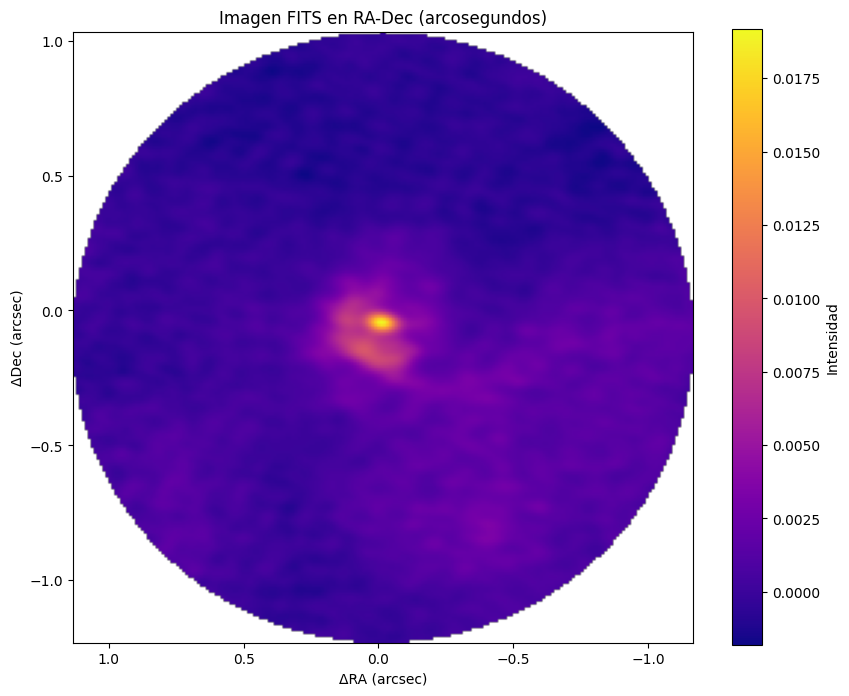

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.wcs import WCS

# Convertir CDELT a arcosegundos
cdelt_arcsec = np.array([-3.055555554292e-06, 3.055555554292e-06]) * 3600  # Conversión de grados a arcosegundos

# Obtener dimensiones de la imagen
ny, nx = datos_2d.shape

# Crear los valores de los ejes en arcosegundos
x_axis = (np.arange(nx) - 103) * cdelt_arcsec[0]  # Centrado en CRPIX
y_axis = (np.arange(ny) - 112) * cdelt_arcsec[1]  # Centrado en CRPIX

# Graficar la imagen con coordenadas correctas
plt.figure(figsize=(10, 8))
plt.imshow(datos_2d, cmap='plasma', origin='lower',
           extent=[x_axis.max(), x_axis.min(), y_axis.min(), y_axis.max()])  # Invertimos X para RA

plt.colorbar(label="Intensidad")

# Etiquetas de los ejes en coordenadas del cielo
plt.xlabel("ΔRA (arcsec)")  # RA decrece hacia la derecha
plt.ylabel("ΔDec (arcsec)")  # Dec crece hacia arriba
plt.title("Imagen FITS en RA-Dec (arcosegundos)")

# Mostrar la imagen
plt.show()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


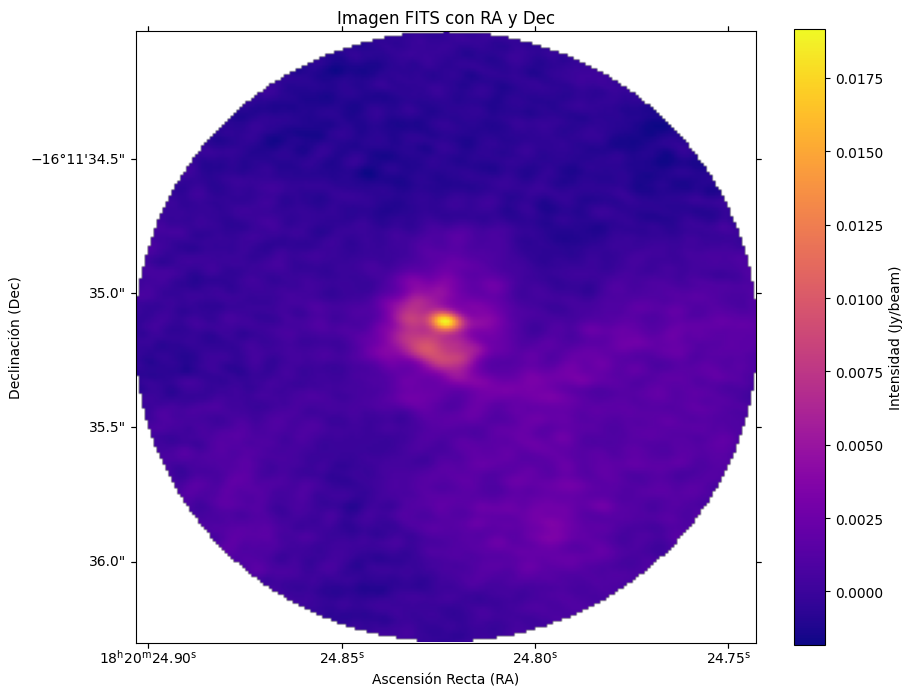

In [22]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Abrir el archivo FITS
hdul = fits.open('ALMA01582922_CONTI_P2019_cutted.fits')

# Extraer los datos y el WCS del header
datos_2d = hdul[0].data[0, 0, :, :]  # Reducir dimensiones
wcs = WCS(hdul[0].header).celestial  # Tomar solo las coordenadas celestiales

# Graficar usando WCS
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': wcs})

# Mostrar la imagen
im = ax.imshow(datos_2d, cmap='plasma', origin='lower')

# Añadir barra de color
cbar = plt.colorbar(im, ax=ax, pad=0.05, label='Intensidad (Jy/beam)')

# Etiquetas de los ejes en RA y Dec
ax.set_xlabel('Ascensión Recta (RA)')
ax.set_ylabel('Declinación (Dec)')

# Título opcional
plt.title('Imagen FITS con RA y Dec')

# Mostrar la gráfica
plt.show()

# Cerrar el archivo FITS
hdul.close()


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


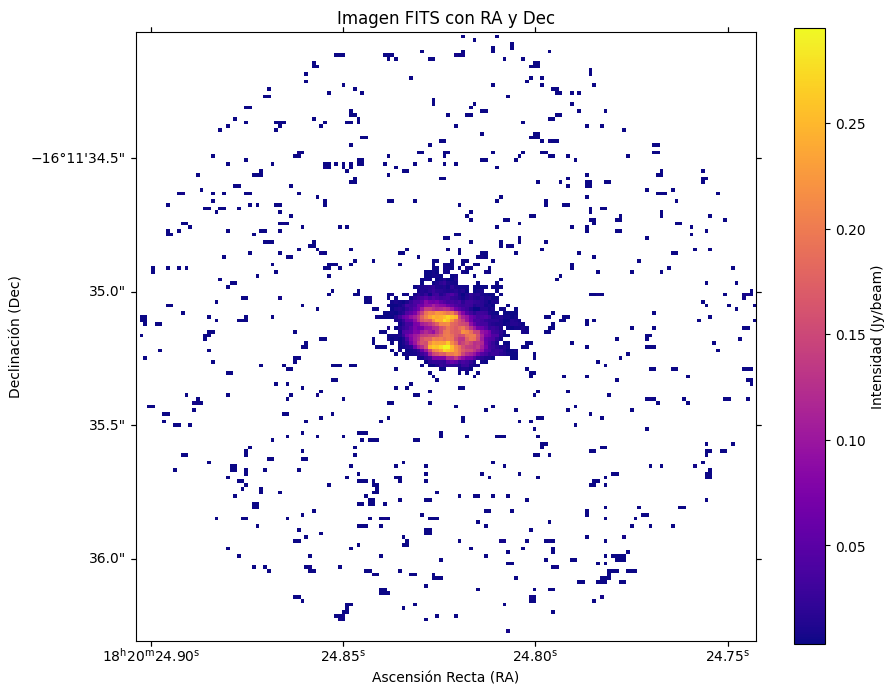

In [23]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS

# Abrir el archivo FITS
hdul = fits.open('ALMB00094768_moment0_H35_PRUEBA.fits')

# Extraer los datos y el WCS del header
datos_2d = hdul[0].data[0, 0, :, :]  # Reducir dimensiones
wcs = WCS(hdul[0].header).celestial  # Tomar solo las coordenadas celestiales

# Graficar usando WCS
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': wcs})

# Mostrar la imagen
im = ax.imshow(datos_2d, cmap='plasma', origin='lower')

# Añadir barra de color
cbar = plt.colorbar(im, ax=ax, pad=0.05, label='Intensidad (Jy/beam)')

# Etiquetas de los ejes en RA y Dec
ax.set_xlabel('Ascensión Recta (RA)')
ax.set_ylabel('Declinación (Dec)')

# Título opcional
plt.title('Imagen FITS con RA y Dec')

# Mostrar la gráfica
plt.show()

# Cerrar el archivo FITS
hdul.close()

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


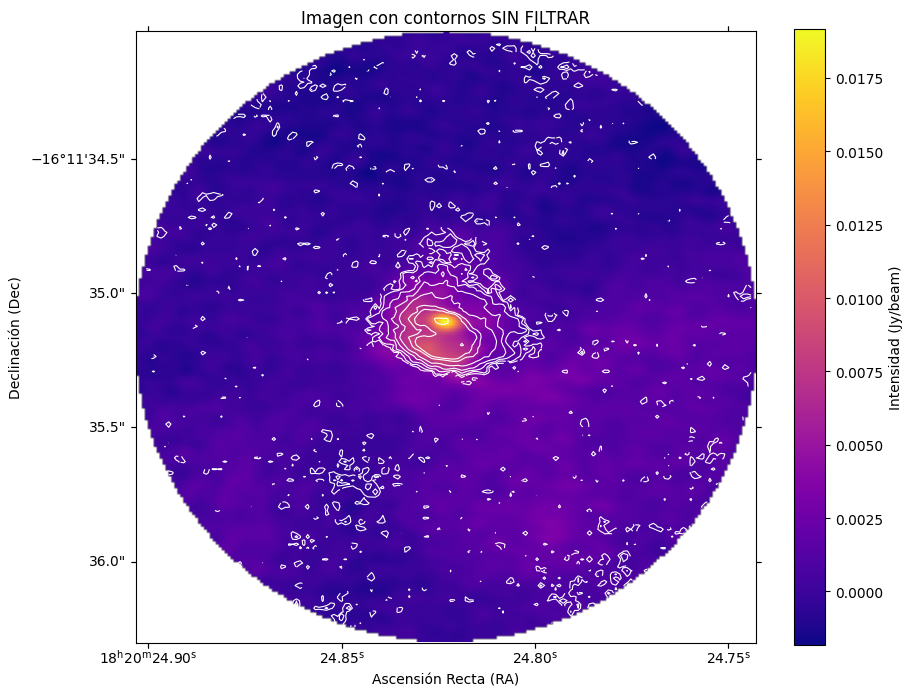

In [53]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np

# Abrir el archivo de la imagen base
hdul_base = fits.open('ALMA01582922_CONTI_P2019_cutted.fits')
datos_base = hdul_base[0].data[0, 0, :, :]  # Reducir dimensiones
wcs_base = WCS(hdul_base[0].header).celestial

# Abrir el archivo del momento 0
hdul_moment0 = fits.open('ALMB00094768_m0_3sigma.fits')
datos_moment0 = hdul_moment0[0].data[0, 0, :, :]  # Reducir dimensiones
wcs_moment0 = WCS(hdul_moment0[0].header).celestial

# Definir el sigma conocido
sigma = 3e-3  # Jy/beam

# Crear niveles de contorno específicos
#niveles_contorno = np.array([-3, 1, 3, 5, 10, 20, 40]) * sigma  # Multiplicamos por sigma
niveles_contorno = np.array([-3,3,5,10,20,40,80,100,150]) * sigma
#niveles_contorno = np.array([-1,1]) * sigma


# Graficar la imagen base
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': wcs_base})
im = ax.imshow(datos_base, cmap='plasma', origin='lower')

# Añadir contornos del momento 0
contornos = ax.contour(datos_moment0, levels=niveles_contorno, colors='white', linewidths=0.8, transform=ax.get_transform(wcs_moment0))

# Etiquetar contornos
#ax.clabel(contornos, inline=True, fontsize=8, fmt='%.2e')  # Formato científico para los niveles

# Añadir barra de color para la imagen base
cbar = plt.colorbar(im, ax=ax, pad=0.05, label='Intensidad (Jy/beam)')

# Etiquetas de los ejes
ax.set_xlabel('Ascensión Recta (RA)')
ax.set_ylabel('Declinación (Dec)')

# Título
#plt.title('Imagen con contornos específicos (niveles en múltiplos de $3 \,mJy/beam$)')
plt.title('Imagen con contornos SIN FILTRAR')
# Mostrar la gráfica
# Guardar la imagen en diferentes formatos
plt.savefig("imagen_contornos.png", dpi=300, bbox_inches='tight')  # PNG
plt.show()

#plt.savefig("imagen_contornos.pdf", dpi=300, bbox_inches='tight')  # PDF
#plt.savefig("imagen_contornos.eps", dpi=300, bbox_inches='tight')  # EPS (para publicaciones)
#plt.savefig("imagen_contornos.svg", dpi=300, bbox_inches='tight')  # SVG (para gráficos vectoriales)


# Cerrar los archivos FITS
hdul_base.close()
hdul_moment0.close()


In [55]:
from fits_plotter import FITSPlotter

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


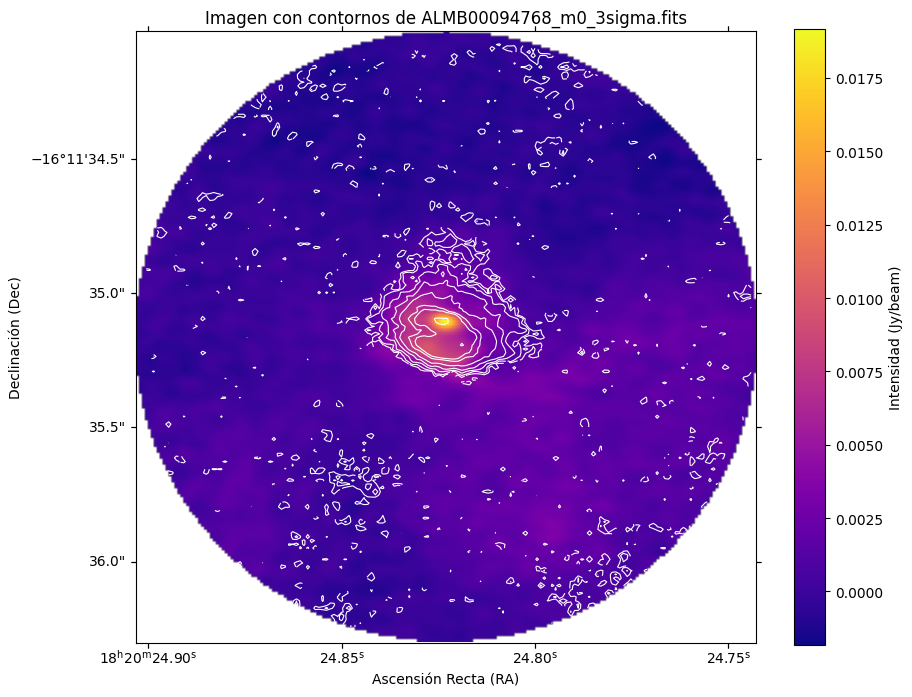

Archivos FITS cerrados.


In [56]:
# Crear un objeto para graficar
plotter = FITSPlotter('ALMA01582922_CONTI_P2019_cutted.fits', 'ALMB00094768_m0_3sigma.fits')
plotter.plot(contour_levels=[-3, 3, 5, 10, 20, 40, 80, 100, 150])
plotter.close()
